In [1]:
# problem 2(a)
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import mltools.dtree as d_tree

X = np.genfromtxt("X_train.txt", delimiter=None)[:10000] 
Y = np.genfromtxt("Y_train.txt", delimiter=None)[:10000] 
Xtr, Xte, Ytr, Yte = ml.splitData(X, Y, 0.75)

In [2]:
# problem 2(b)
learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=50)
print "Training Error   = ", learner.err(Xtr, Ytr)
print "Validation Error = ", learner.err(Xte, Yte)

Training Error   =  0.0036
Validation Error =  0.3836


In [3]:
# problem 2(c)
for d in range(16):
    learner.train(Xtr, Ytr, maxDepth = d)
    Xtr_error = learner.err(Xtr, Ytr)
    Xte_error = learner.err(Xte, Yte)
    print("Depth {:02d}: training error = {:05f} validation error = {:05f}".format(d, Xtr_error, Xte_error))

Depth 00: training error = 0.340267 validation error = 0.346400
Depth 01: training error = 0.340267 validation error = 0.346400
Depth 02: training error = 0.322800 validation error = 0.342800
Depth 03: training error = 0.310133 validation error = 0.331600
Depth 04: training error = 0.309333 validation error = 0.330800
Depth 05: training error = 0.303733 validation error = 0.324400
Depth 06: training error = 0.296933 validation error = 0.326400
Depth 07: training error = 0.284933 validation error = 0.331600
Depth 08: training error = 0.272933 validation error = 0.331600
Depth 09: training error = 0.258667 validation error = 0.340000
Depth 10: training error = 0.236133 validation error = 0.329200
Depth 11: training error = 0.215867 validation error = 0.344000
Depth 12: training error = 0.194933 validation error = 0.349200
Depth 13: training error = 0.176800 validation error = 0.347600
Depth 14: training error = 0.158667 validation error = 0.356800
Depth 15: training error = 0.141733 vali

In [4]:
# problem 2(d)
for d in range(2, 13):
    learner.train(Xtr, Ytr, maxDepth=50, minLeaf=2**d)
    Xtr_error = learner.err(Xtr, Ytr)
    Xte_error = learner.err(Xte, Yte)
    print("2^{:02d} min leaf: training error = {:05f} validation error = {:05f}".format(d,Xtr_error,Xte_error))

2^02 min leaf: training error = 0.098533 validation error = 0.381200
2^03 min leaf: training error = 0.168533 validation error = 0.373200
2^04 min leaf: training error = 0.227600 validation error = 0.373200
2^05 min leaf: training error = 0.265467 validation error = 0.342400
2^06 min leaf: training error = 0.289467 validation error = 0.319600
2^07 min leaf: training error = 0.300533 validation error = 0.315200
2^08 min leaf: training error = 0.310133 validation error = 0.320800
2^09 min leaf: training error = 0.317600 validation error = 0.329200
2^10 min leaf: training error = 0.322800 validation error = 0.342800
2^11 min leaf: training error = 0.340267 validation error = 0.346400
2^12 min leaf: training error = 0.340267 validation error = 0.346400


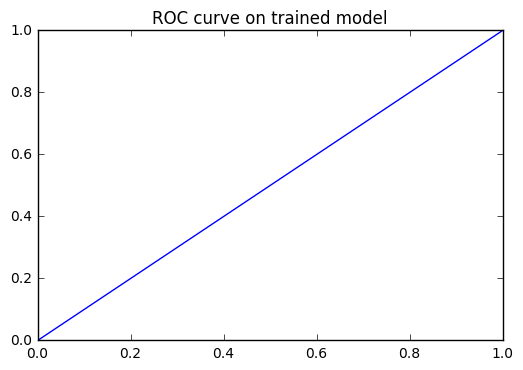

In [5]:
# problem 2(f)
(A,B,C)=learner.roc(Xtr, Ytr)
plt.plot(A, B)
plt.title("ROC curve on trained model")
plt.show()

In [6]:
print "AUC score on training data   = ", learner.auc(Xtr, Ytr)

AUC score on training data   =  0.5


In [7]:
X2 = np.genfromtxt("X_train.txt", delimiter=None)[10000:20000] 
Y2 = np.genfromtxt("Y_train.txt", delimiter=None)[10000:20000] 
Xtr2, Xte2, Ytr2, Yte2 = ml.splitData(X2, Y2, 0.75)
learner2 = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=50)
learner2.train(X2, Y2, minLeaf=2**6, maxDepth=7)

print "AUC score on validation data = ", learner2.auc(Xte2, Yte2)

AUC score on validation data =  0.709440978185


In [8]:
# problem 2(g)
learner.train(X, Y, minLeaf=2**6, maxDepth=7)

XT = np.genfromtxt("X_test.txt", delimiter=None)
Ypred = learner.predictSoft(XT)

#np.savetxt("Yhat_dtree.txt", np.vstack((np.arange(len(Ypred)), Ypred[:,1])).T, "%d, %.2f",header="ID,Prob1",comments="",delimiter=",")

In [9]:
# problem 3(a)
X = np.genfromtxt("X_train.txt", delimiter=None)[:10000] 
Y = np.genfromtxt("Y_train.txt", delimiter=None)[:10000]
Xtr, Xte, Ytr, Yte = ml.splitData(X, Y, 0.75)

m = Xtr.shape[0]
n = Xte.shape[0]
nBag = 25
classifiers = [None]*nBag
predict_Xtr = np.zeros((m, nBag))
predict_Xte = np.zeros((n, nBag))

for i in range(nBag):
    A, B = ml.bootstrapData(Xtr, Ytr, m)
    classifiers[i] = ml.dtree.treeClassify(A, B, maxDepth=15, minLeaf=4)
    predict_Xtr[:, i] = classifiers[i].predict(Xtr)
    predict_Xte[:, i] = classifiers[i].predict(Xte)

In [10]:
for i in [1, 5, 10, 25]:
    train_error = ((Ytr-predict_Xtr[:,0:i].mean(axis=1))**2).mean()
    val_error   = ((Ytr[:2500]-predict_Xte[:,0:i].mean(axis=1))**2).mean()
    print("{:02d} learners: training error = {:05f} validation error = {:05f}".format(i, train_error, val_error))

01 learners: training error = 0.234533 validation error = 0.417200
05 learners: training error = 0.132075 validation error = 0.300096
10 learners: training error = 0.115667 validation error = 0.280632
25 learners: training error = 0.108492 validation error = 0.271764


In [11]:
# problem 3(b)
learner_new = ml.dtree.treeClassify(A, B, maxDepth=15, minLeaf=4)

print "AUC score on validation data = ", learner_new.auc(Xte1, Yte1)

AUC score on validation data = 

NameError: name 'Xte1' is not defined

In [ ]:
XT2 = np.genfromtxt("X_test.txt", delimiter=None)
Ypred2 = learner_new.predictSoft(XT2)

#np.savetxt("Yhat_rforest.txt", np.vstack((np.arange(len(Ypred2)), Ypred2[:,1])).T, "%d, %.2f",header="ID,Prob1",comments="",delimiter=",")